In [12]:
import sys
import warnings
warnings.filterwarnings("ignore")
sys.path.append("../")
from lib.slices import EegSlicesChb, EegSlicesSiena, EegSlicesTusz
from lib.visuals import plot_eeg_windows, plot_eeg_spectrum
from lib.bss import IWasobi, EogDenoiser, CanonicalCorrelation, EmgDenoiser

######### LOAD ALL THE METADATA FILES ########
slices_chb = EegSlicesChb()
slices_siena = EegSlicesSiena()
slices_tusz = EegSlicesTusz()

### * Explore the sliced EEG - CHB

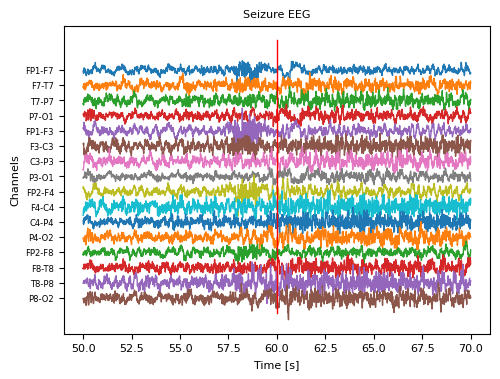

In [5]:
PATIENT = "chb12"
SEIZURE_NUMBER = 0
PERIOD = [50, 70]

metadata, eeg_array = slices_chb.get(PATIENT, SEIZURE_NUMBER)

###########################################################
current_metadata = {}
current_metadata["seizures"] = [(0, 0, None), (metadata["seizure_start"], metadata["seizure_end"], metadata["seizure_type"])]
plot_eeg_windows(eeg_array, current_metadata, metadata["channels"], metadata["sampling_frequency"], PERIOD)

### * Explore the sliced EEG - SIENA

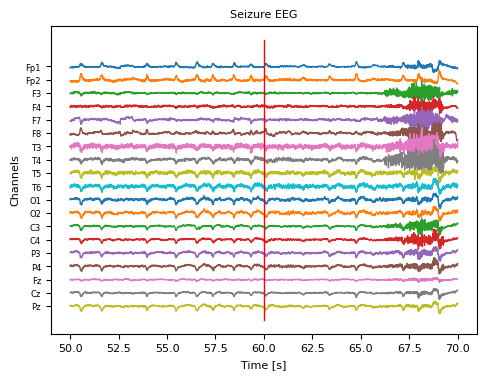

In [7]:
PATIENT = "PN00"
SEIZURE_NUMBER = 0
PERIOD = [50, 70]

metadata, eeg_array = slices_siena.get(PATIENT, SEIZURE_NUMBER)

###########################################################
current_metadata = {}
current_metadata["seizures"] = [(0, 0, None), (metadata["seizure_start"], metadata["seizure_end"], metadata["seizure_type"])]
plot_eeg_windows(eeg_array, current_metadata, metadata["channels"], metadata["sampling_frequency"], PERIOD)

### * Explore the sliced EEG - TUSZ

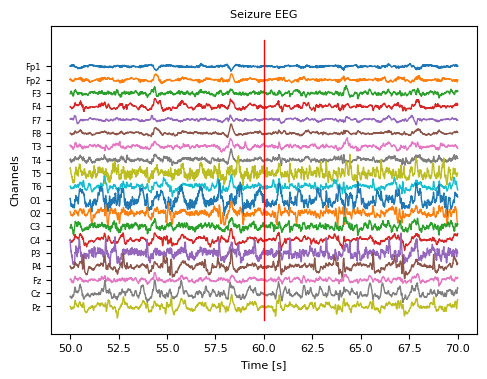

In [2]:
PATIENT = "aaaaatjz"
SEIZURE_NUMBER = 0
PERIOD = [50, 70]

metadata, eeg_array = slices_tusz.get(PATIENT, SEIZURE_NUMBER)

###########################################################
current_metadata = {}
current_metadata["seizures"] = [(0, 0, None), (metadata["seizure_start"], metadata["seizure_end"], metadata["seizure_type"])]
plot_eeg_windows(eeg_array, current_metadata, metadata["channels"], metadata["sampling_frequency"], PERIOD)

### Compute sources by using iWASOBI

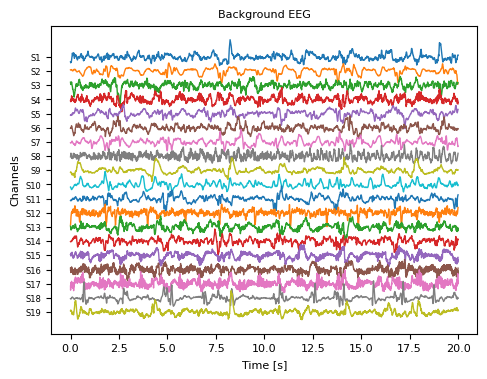

Source = 1, fd = 4.9369237069340315
Source = 2, fd = 4.37243780765111
Source = 3, fd = 5.346141274966271
Source = 4, fd = 5.749998027703287
Source = 5, fd = 4.693429030612711
Source = 6, fd = 4.971760737840762
Source = 7, fd = 4.660460450210785
Source = 8, fd = 5.622477537248041
Source = 9, fd = 4.427126834091231
Source = 10, fd = 4.547428174997567
Source = 11, fd = 4.7199470893673645
Source = 12, fd = 5.479156135461212
Source = 13, fd = 5.480370179345482
Source = 14, fd = 5.144313296061614
Source = 15, fd = 5.857347009686011
Source = 16, fd = 6.12395361702993
Source = 17, fd = 6.507862170246802
Source = 18, fd = 4.769223887610499
Source = 19, fd = 5.210097367099352
Done!
2025-02-24 00:06:49,177 - root - INFO - Number of sources to be removed = 5


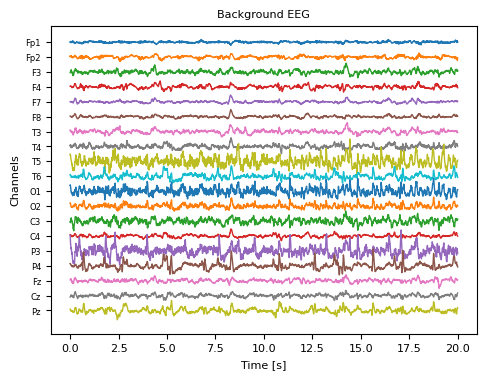

In [11]:
iwasobi = IWasobi()
eeg_sources = iwasobi.fit_transform(eeg_array[:, PERIOD[0]*metadata["sampling_frequency"]:
                                                 PERIOD[1]*metadata["sampling_frequency"]])

###########################################################
plot_eeg_windows(eeg_sources, current_metadata, [f"S{idx}" for idx in range(1, eeg_sources.shape[0] + 1)],
                 metadata["sampling_frequency"], period=[0, 20])

###########################################################
eog_denoiser = EogDenoiser()
eog_denoiser.fit_fractal_dimensions(eeg_sources)
print(eog_denoiser)

eeg_sources = eog_denoiser.remove_low_dimension_sources([0, 5])

###########################################################
clean_eeg = iwasobi.inverse_transform(eeg_sources)

plot_eeg_windows(clean_eeg, current_metadata, metadata["channels"],
                 metadata["sampling_frequency"], period=[0, 20])

### * Compute sources using BSS Canonical Correlation Analysis

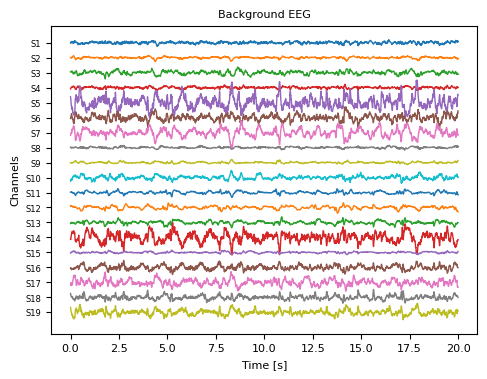

Source = 1, fd = 63.470041513100554
Source = 2, fd = 262.18989491825454
Source = 3, fd = 190.69142831794926
Source = 4, fd = 89.08336858429087
Source = 5, fd = 130.81596087824605
Source = 6, fd = 116.46891353967035
Source = 7, fd = 283.2166396400386
Source = 8, fd = 145.77978476604738
Source = 9, fd = 220.91540922144222
Source = 10, fd = 170.2220457487602
Source = 11, fd = 197.40889000533375
Source = 12, fd = 315.4728468664165
Source = 13, fd = 174.3910681226685
Source = 14, fd = 132.42780715762453
Source = 15, fd = 150.73847550695965
Source = 16, fd = 117.8026095050906
Source = 17, fd = 143.07318957248464
Source = 18, fd = 78.82638701582546
Source = 19, fd = 131.3691109668001
Done!
2025-02-24 00:10:00,705 - root - INFO - Number of sources to be removed = 0


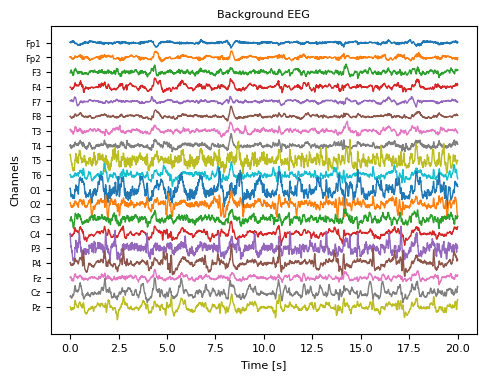

In [17]:
bsscca = CanonicalCorrelation()
eeg_sources = bsscca.fit_transform(eeg_array[:, PERIOD[0]*metadata["sampling_frequency"]:
                                                PERIOD[1]*metadata["sampling_frequency"]])

###########################################################
plot_eeg_windows(eeg_sources, current_metadata, [f"S{idx}" for idx in range(1, eeg_sources.shape[0] + 1)],
                 metadata["sampling_frequency"], period=[0, 20])

###########################################################
emg_denoiser = EmgDenoiser(sampling_frequency=metadata["sampling_frequency"])
emg_denoiser.fit_psd_ratio(eeg_sources)
print(emg_denoiser)

eeg_sources = emg_denoiser.remove_low_ratio_sources([0, 5])

###########################################################
clean_eeg = bsscca.inverse_transform(eeg_sources)
plot_eeg_windows(clean_eeg, current_metadata, metadata["channels"],
                 metadata["sampling_frequency"], period=[0, 20])

### * Stationarity tests (KPPS and ADF)

In [10]:
stats_gateway = StatisticalTests()
stats_gateway.check_stationarity(processor._data[15, :4000])

2025-02-21 00:21:38,786 - root - INFO - KPSS test, null hyphotesis was not rejected, p_value = 0.1, significance level = 0.05
2025-02-21 00:21:39,151 - root - INFO - ADF test, null hyphotesis was rejected, p_value = 4.673586799853306e-13, significance level = 0.05
2025-02-21 00:21:39,152 - root - INFO - The time serie is stationary
